In [168]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [244]:
#daily interception threshold D
# Sutanto et al. 2012
#Partitioning of evaporation into transpiration, soil evaporation and interception: a comparison between isotope measurements and a HYDRUS-1D model
k=0.463
LAI=5

#surface cover fraction ()
def cal_b(k, LAI):
    """
    Calculate b in the interception threshold equation
    Args:
    k: extinction coefficient (unitless)
    LAI: leaf area index (unitless) taken for clipped grass 0.05-0.15m height.
    Returns:
    b: b in the interception threshold equation
    """
    b=1-math.exp(-k*LAI)
    return b


def daily_interception_threshold(P, a, k, LAI):
    """
    Calculate interception threshold D in mm/day: A minimum daily threshold of precipitation required to initiate interception
    If precipitation is less than D, all precipitation is intercepted, otherwise, interception equals to D
    Args:
    k: extinction coefficient (unitless)
    LAI: leaf area index (unitless)
    P: precipitation (mm/day)
    a: interception parameter (mm)
    Returns:
    D: interception threshold (mm/day)
    """
    b=cal_b(k, LAI)
    Id=a*LAI*(1-1/(1+(b*P/a*LAI)))
    return It

#interception ratio
def interception_ratio_Ir(P, a, k, LAI,n):
    """
    Calculate interception ratio: the ratio of intercepted precipitation to total precipitation
    Args:
    k: extinction coefficient (unitless)
    LAI: leaf area index (unitless)
    P: Monthly precipitation (mm)
    a: interception parameter (mm)
    n: number of rainy days per month (threshold of 1mm/day is used to define rainy days)
    Returns:
    interception_ratio: interception ratio (unitless)
    """
    Id=daily_interception_threshold(P, a, k, LAI)
    if P==0:
        interception_ratio=0
    else:
        interception_ratio=1-math.exp((-It*n)/P)

    return interception_ratio

#De Groen and Savenije 2006 A monthly interception equation based on the statistical characteristics of daily rainfall


def monthly_interception(P,a,k,LAI,n):
    """
    Calculate monthly interception in mm
    Returns:
    interception: monthly interception (mm)
    """
    b=cal_b(k, LAI)
    It=interception_threshold_It(P, a, k, LAI)
    Ir=interception_ratio_Ir(P, a, k, LAI,n)

    if P<It:
        interception=P
    else:
        interception=P*Ir


    return interception

In [257]:
Im_=[]
Ir_=[]
It_=[]
P_=pd.DataFrame(np.arange(0,500,5))
a,k,LAI,n=1.5,0.463,5,15
for P in range(0,500,5):
  It=interception_threshold_It(P, a, k, LAI)
  Ir=interception_ratio_Ir(P, a, k, LAI,n)
  Im=monthly_interception(P,a,k,LAI,n)
  Ir_.append(Ir)
  Im_.append(Im)
  It_.append(It)

Im_=pd.DataFrame(Im_)
Ir_=pd.DataFrame(Ir_)
It_=pd.DataFrame(It_)

#combine the dfs
df=pd.concat([P_,Im_,Ir_,It_],axis=1)
df.columns=['P','Im','Ir','It']
df.set_index('P',inplace=True)

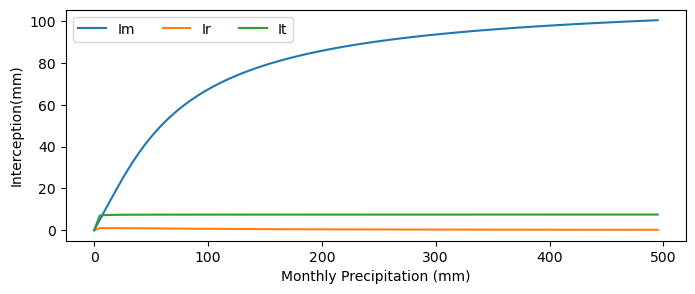

In [258]:
fig,ax=plt.subplots(figsize=(8,3))
ax.plot(df, label=['Im','Ir','It'])
ax.set_xlabel('Monthly Precipitation (mm)')
ax.set_ylabel('Interception(mm)')
plt.legend(['Im','Ir','It'], ncol=3)

In [247]:
df

,Im,Ir,It
P,,,
0,0.000000,0.000000,0.000000
5,4.996746,0.999349,2.445725
10,9.754942,0.975494,2.472565
15,13.745913,0.916394,2.481643
20,16.901007,0.845050,2.486207
...,...,...,...
475,36.049841,0.075894,2.499416
480,36.064554,0.075134,2.499422
485,36.078972,0.074390,2.499428
